In [1]:
from colorsys import hls_to_rgb
import math
import matplotlib.pyplot as plt
import numpy as np
import cmath
import sys


In [2]:
# Define available mathematical functions and constants
FUNCTION_LIMITS = {
    'sqrt': cmath.sqrt, 'exp': cmath.exp, 'log': cmath.log, 'ln': cmath.log,
    'sin': cmath.sin, 'cos': cmath.cos, 'tan': cmath.tan,
    'pi': cmath.pi, 'e': cmath.e, 'arg': cmath.phase
}

def rect_to_polar(z):
    r = abs(z)
    theta = cmath.phase(z)
    return [r, theta]

def polar_to_rect(polar):
    r, theta = polar
    real = r * math.cos(theta)
    imag = r * math.sin(theta)
    return complex(real, imag)

def graph_function(func, name, inverted):
    vals_to_plot = []
    reals = []
    imags = []
    colors = []

    # Generate points in the domain
    r_values = np.arange(0, 2, 0.01)
    theta_values = np.arange(0, 2 * math.pi, 0.005)
    for r in r_values:
        for theta in theta_values:
            vals_to_plot.append(cmath.rect(r, theta))

    for val in vals_to_plot:
        reals.append(val.real)
        imags.append(val.imag)

        try:
            z = func(val)
            abs_val, arg = rect_to_polar(z)
            arg = arg % (2 * math.pi)  # Normalize argument

            # Map to HLS color
            lightness = (2 / math.pi) * math.atan(abs_val)
            if inverted:
                lightness = 1 - lightness
            color = hls_to_rgb(arg / (2 * math.pi), lightness, 1)
            colors.append(color)
        except Exception:
            colors.append(hls_to_rgb(1, 1, 1) if not inverted else hls_to_rgb(0, 0, 0))

    return np.array(reals), np.array(imags), [5] * len(reals), np.array(colors)

def plot_function(funcion="lambda z: z ** 3 - 1", nombre="z^3 - 1", invertida=False):
    complex_func = complex_function(funcion)

    key = graph_function(lambda z: z, "z", invertida)
    new = graph_function(complex_func, nombre, invertida)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Complex Function Visualizer')

    ax1.scatter(key[0], key[1], s=key[2], c=key[3])
    ax1.grid()
    ax1.axis('equal')
    ax1.set_title("f(z) = z")

    ax2.scatter(new[0], new[1], s=new[2], c=new[3])
    ax2.grid()
    ax2.axis('equal')
    ax2.set_title(f"f(z) = {nombre}")

    plt.show()

def math_help():
    print("Available complex functions and constants:")
    for key in FUNCTION_LIMITS:
        print(f"  {key}")

def complex_function(s):
    return eval(s, {**FUNCTION_LIMITS, 'cmath': cmath, 'math': math})

# Example usage in Jupyter Notebook
# To visualize, call the plot_function interactively
# For example:
# plot_function("lambda z: z ** 3 - 1", "z^3 - 1", False)


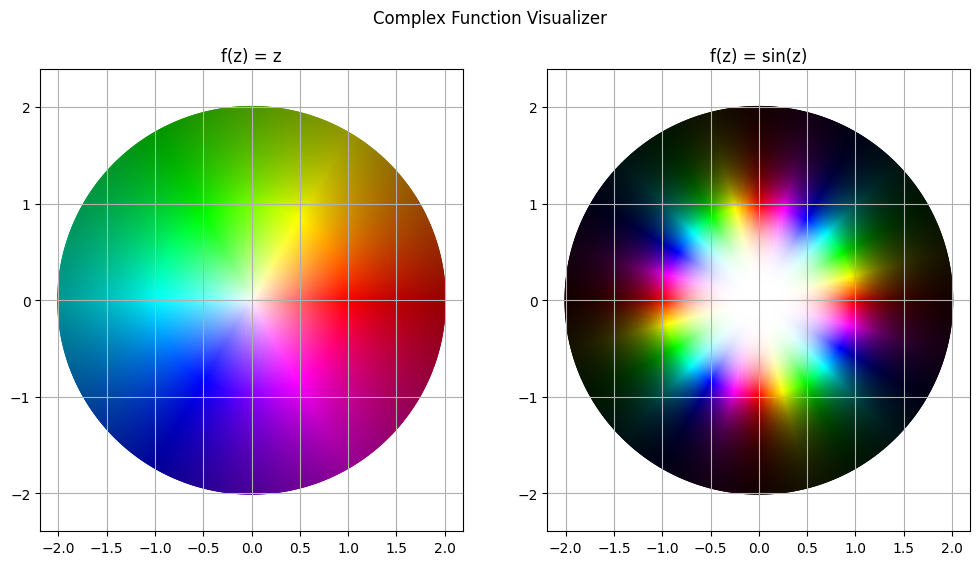

In [5]:
plot_function("lambda z: z**4", "sin(z)", True)